# Image Classification with cifar-10 Dataset



In [9]:
from __future__ import print_function
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

# Load Data

[View Dataset details](https://www.cs.toronto.edu/~kriz/cifar.html)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 


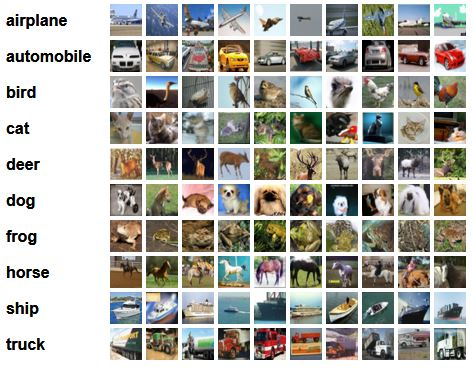

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [24]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
imgListNames=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Preview Sample

truck


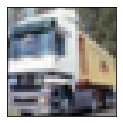

In [226]:
plt.figure(figsize=(2,2))
image_index =1
print("Actual Label=",imgListNames[y_train[image_index].argmax()])
fig=plt.imshow(x_train[image_index])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()



# Tranformation

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# Model

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Train

In [16]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)


In [18]:
if data_augmentation:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator
    (
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,# randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,# randomly shift images vertically (fraction of total height)
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        fill_mode='nearest',# set mode for filling points outside the input boundaries
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rescale=None, # set rescaling factor (applied before any other transformation)
        preprocessing_function=None, # set function that will be applied on each input
        data_format=None,# image data format, either "channels_first" or "channels_last"
        validation_split=0.0 # fraction of images reserved for validation (strictly between 0 and 1)
    )

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),epochs=epochs,
                        steps_per_epoch=len(x_train)/batch_size,
                        validation_data=(x_test, y_test),workers=4)


Using real-time data augmentation.
Epoch 1/100
1563/1562 [==============================] - 400s 256ms/step - loss: 1.8896 - acc: 0.3069 - val_loss: 1.5816 - val_acc: 0.4299
Epoch 2/100
1563/1562 [==============================] - 402s 257ms/step - loss: 1.6044 - acc: 0.4138 - val_loss: 1.5561 - val_acc: 0.4422
Epoch 3/100
1563/1562 [==============================] - 423s 270ms/step - loss: 1.4860 - acc: 0.4633 - val_loss: 1.4330 - val_acc: 0.4850
Epoch 4/100
1563/1562 [==============================] - 464s 297ms/step - loss: 1.3988 - acc: 0.4965 - val_loss: 1.2671 - val_acc: 0.5406
Epoch 5/100
1563/1562 [==============================] - 429s 275ms/step - loss: 1.3249 - acc: 0.5268 - val_loss: 1.1614 - val_acc: 0.5860
Epoch 6/100
1563/1562 [==============================] - 404s 258ms/step - loss: 1.2649 - acc: 0.5516 - val_loss: 1.1821 - val_acc: 0.5821
Epoch 7/100
1563/1562 [==============================] - 385s 246ms/step - loss: 1.2071 - acc: 0.5720 - val_loss: 1.1636 - val_acc:

KeyboardInterrupt: 

# Save

In [19]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at E:\LEARNING\IPY\05 Misc\saved_models\cifar10.h5 


# Evaluate 

In [21]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 19s 2ms/step
Test loss: 0.7787276511192321
Test accuracy: 0.7387


# Predict

Actual= ship 
Predicted= automobile


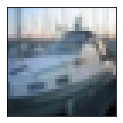

In [227]:
plt.figure(figsize=(2,2))


image_index = image_index+1
if(image_index>1000):
    image_index=0
fig=plt.imshow(x_test[image_index])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

pred = model.predict(x_test[image_index:image_index+1,:,:])
print("Actual=",imgListNames[y_test[image_index].argmax()],"\nPredicted=",imgListNames[pred.argmax()])

# Create Confusion Matrix

In [151]:
def getConfusionMatrix(Y_True,Y_Pred):
    classCount=Y_True.shape[1]
    #in case Y is in term of probablities
    Y_Pred=keras.utils.to_categorical(Y_Pred.argmax(axis = 1), classCount) 
    cnfMtrx=np.zeros((classCount,classCount))
    for i in range(classCount):
        cnfMtrx[i,:]=Y_Pred[np.where(Y_True[:,i]==1)].sum(axis=0)
    return cnfMtrx

In [152]:
Y_pred = model.predict(x_test)
confusion_mtx = getConfusionMatrix(y_test, Y_pred) 

# Plot Confusion Matrix

In [153]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion matrix')
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,rotation=90)
    plt.yticks(tick_marks, classes)

    for i in range(cm.shape[0]):
        for j in (range(cm.shape[1])):
            if cm[i, j] > cm.max() / 2:
                txtclr="white"
            else:
                txtclr="black"
            plt.text(j, i, cm[i, j],horizontalalignment="center",color=txtclr)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
       

    plt.colorbar()
    plt.show()


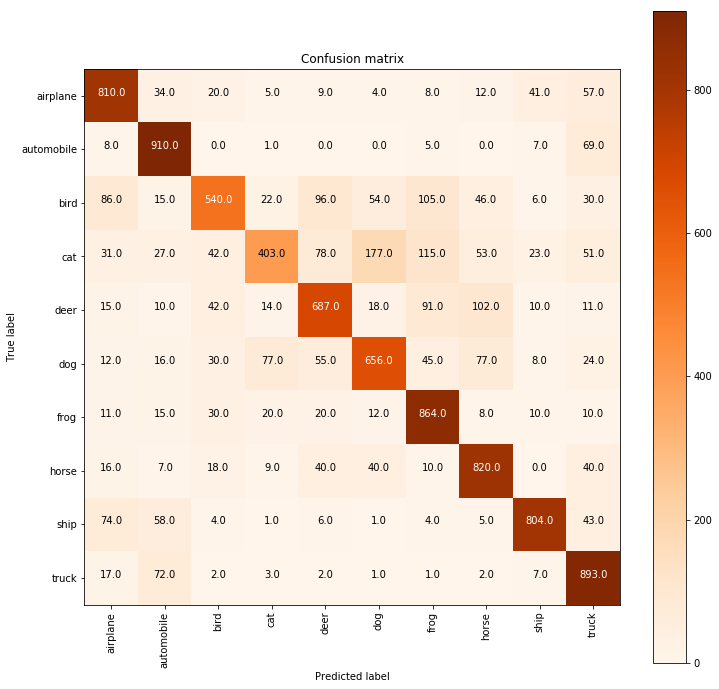

In [154]:
plt.figure(figsize=(12,12))
plot_confusion_matrix(confusion_mtx, classes = imgListNames) 

# Results Analysis
Find images the model labeled incorrectly.

In [222]:
def print_mislabeled_images(classes, test_set_x, test_set_y, Y_prediction_test,maxPrint=20,startIndex=0):
    a = Y_prediction_test.argmax(axis=1) - test_set_y.argmax(axis=1)
    mislabeled_indices = np.asarray(np.where(a != 0))
    num_images = len(mislabeled_indices[0])
    plt.figure(figsize=(10,16))
    print("Showing from ",startIndex," to ",startIndex-1+np.min([num_images,maxPrint,num_images-startIndex+1]), " of total ",num_images, "mislabeled.") 
    num_images=np.min([num_images,maxPrint,num_images-startIndex+1]) 
    for i in range(num_images):
        index = mislabeled_indices[0][i+startIndex-1]
        plt.subplot( int(maxPrint/4)+1, 5, i + 1)
        #plt.axis('off')
        fig=plt.imshow(test_set_x[index,:,:,:],interpolation='nearest')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.title("Pred: " + classes[(Y_prediction_test.argmax(axis=1)[index])]
                  + " \n Actual: " + classes[test_set_y.argmax(axis=1)[index]])
    plt.show()

In [223]:
startIndex=1
maxPrint=20

## Run Cell Again and Again to View All 

Showing from  1  to  20  of total  2613 mislabeled.


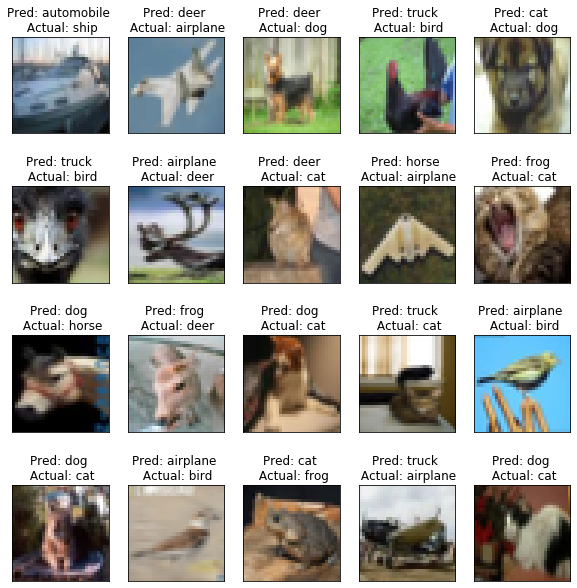

In [224]:
print_mislabeled_images(imgListNames, x_test, y_test, Y_pred,maxPrint=maxPrint,startIndex=startIndex)
startIndex=startIndex+maxPrint